<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Logistic_Regression_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


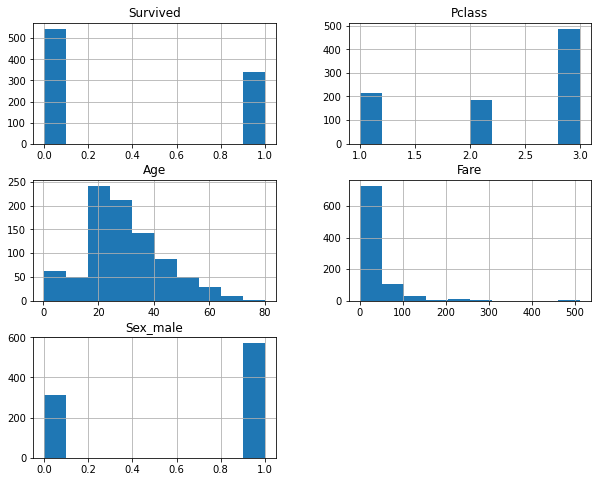

In [52]:
df.hist(figsize=(10,8));

In [45]:
df.drop(["Name","Siblings/Spouses Aboard","Parents/Children Aboard"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [46]:
X = df.drop("Survived", axis=1)
X = sm.add_constant(X)
y = df.Survived

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [48]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.420186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.3689
Time:                        05:09:05   Log-Likelihood:                -297.91
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 4.073e-74
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5327      0.637      8.679      0.000       4.283       6.782
Pclass        -1.3306      0.

In [49]:
preds = model.predict(X_test)
preds = np.where(preds > 0.5, 1, 0)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("Confusion_matrix:\n",confusion_matrix(y_test, preds))
print(f"Accuracy: {round(((tp + tn) / (tp+tn+fp+fn)) * 100, 1)}%")
print(f"Recall: {round(((2* tp) / (2 * tp+fn+fp)) * 100, 1)}%")
print(f"Specitivity: {round(((tn) / (tn + fp))* 100, 1)}%")
print(f"Sensitivity: {round(((tp) / (tp + fn))* 100, 1)}%")

Confusion_matrix:
 [[83 25]
 [24 46]]
Accuracy: 72.5%
Recall: 65.2%
Specitivity: 76.9%
Sensitivity: 65.7%


In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       108
           1       0.65      0.66      0.65        70

    accuracy                           0.72       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.73      0.72      0.73       178

